# サポートベクターマシン（SVM）

In [25]:
from sklearn import datasets # データセット
from sklearn.model_selection import train_test_split # データ分割
from sklearn.preprocessing import StandardScaler # 標準化
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.metrics import accuracy_score # 正確さ

from mlxtend.plotting import plot_decision_regions # グラフ作成

import matplotlib.pyplot as plt # グラフ作成
import numpy as np # 行列計算

## データの用意

In [36]:
iris = datasets.load_iris() # データセットを読み込む

#print(iris.data)

x = iris.data[:, [2, 3]] # 学習データ
y = iris.target # ラベルデータ

print(x)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

## データの前処理

In [27]:
# 学習データとラベルデータを訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(
    x,# 学習データ
    y,# ラベルデータ
    test_size=0.3, # テストデータの割合
    random_state=None) # ???

# データの標準化処理
sc = StandardScaler() # インスタンス生成
sc.fit(x_train) # データセットの情報をセットする
x_train_std = sc.transform(x_train) # x_trainを標準化
x_test_std = sc.transform(x_test) # x_testを標準化

## モデルの学習

In [28]:
# 線形サポートベクタマシンのインスタンスを生成
model = SVC(kernel='linear', random_state=None)

# モデルの学習
model.fit(x_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## モデルの制度を評価する

In [29]:
#訓練データに対する精度
pred_train = model.predict(x_train_std)# 予測する
accuracy_train = accuracy_score(y_train, pred_train)# 予測確率を出す
print('正答率: %.2f' % accuracy_train)

正答率: 0.94


In [30]:
# テストデータに対する精度
pred_test = model.predict(x_test_std)# 予測する
accuracy_test = accuracy_score(y_test, pred_test)# 予測確率を出す
print('正答率: %.2f' % accuracy_test)

正答率: 0.98


# 実際の分類の様子


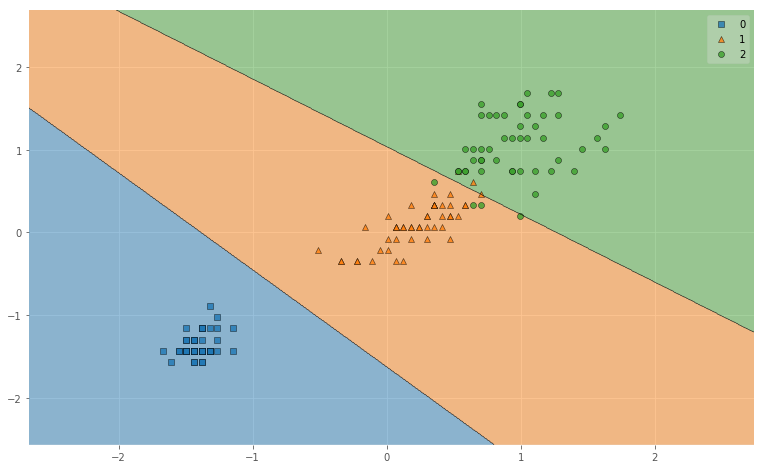

In [33]:
plt.style.use('ggplot') # テーマ

x_combined_std = np.vstack((x_train_std, x_test_std)) #  訓練データとテストデータを混ぜる
y_combined = np.hstack((y_train, y_test)) # 訓練データとテストデータを混ぜる

fig = plt.figure(figsize=(13, 8)) # 図のインスタンスを作成
plot_decision_regions(x_combined_std, y_combined, clf=model, res=0.02) # 
plt.show() # 表示